In [56]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import sklearn.linear_model
import os.path

import time

from NeuralNet import NeuralNet
from utils.json import *

np.random.seed(1)

In [57]:
df = pd.read_csv("data/train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
X, Y = df.drop('label', axis=1), df['label']
print('Training set: X={}, y={}'.format(X.shape, Y.shape))

Training set: X=(42000, 784), y=(42000,)


In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X.to_numpy(), Y.values.reshape((Y.shape[0], 1)), test_size = 0.2, random_state=10) # Y.values

In [60]:
X_train = X_train / 255
X_test = X_test / 255

In [61]:
encoder = OneHotEncoder()

In [62]:
Y_train.shape

(33600, 1)

In [63]:
Y_train_e = encoder.fit_transform(Y_train).toarray()
Y_train_e.shape

(33600, 10)

In [64]:
cls = NeuralNet(layer_dims = [784, 60, 10], learning_rate = 0.1, num_iter = 100, \
                         normalize = False, mini_batch_size=2048, T=1)

In [65]:
cls.parameters = read_from_json("nets/main_nn_300")

(60, 784)
(10, 60)
Cost after iteration 0: 0.227491
Cost after iteration 10: 0.058368
Cost after iteration 20: 0.039539
Cost after iteration 30: 0.034865
Cost after iteration 40: 0.029274
Cost after iteration 50: 0.027745
Cost after iteration 60: 0.025838
Cost after iteration 70: 0.025080
Cost after iteration 80: 0.022732
Cost after iteration 90: 0.021321


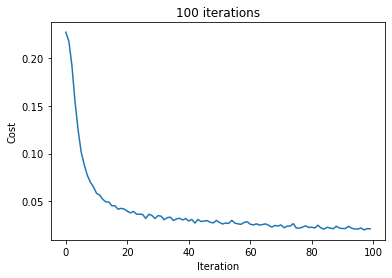

In [21]:
cls.fit(X_train, Y_train_e)

In [28]:
#cls.keep_fitting(X_train, Y_train_e, 200)

In [14]:
cls.num_iter

300

In [66]:
Y_train_hat = cls.predict(X_train)
Y_test_hat = cls.predict(X_test)

print(accuracy_score(Y_train, Y_train_hat))
print(accuracy_score(Y_test, Y_test_hat))

0.9702678571428571
0.9580952380952381


In [23]:
save_to_json(cls.parameters, "nets/main_nn_100")

In [80]:
T = 30
cls.T = T
Y_dist = cls.predict_proba(X_train)
np.round(Y_dist[:10], 2)

array([[0.08, 0.08, 0.09, 0.09, 0.14, 0.11, 0.1 , 0.1 , 0.11, 0.11],
       [0.08, 0.1 , 0.09, 0.1 , 0.1 , 0.1 , 0.08, 0.13, 0.1 , 0.12],
       [0.09, 0.09, 0.1 , 0.11, 0.09, 0.1 , 0.07, 0.14, 0.1 , 0.12],
       [0.09, 0.09, 0.09, 0.11, 0.09, 0.13, 0.08, 0.1 , 0.1 , 0.11],
       [0.1 , 0.08, 0.11, 0.11, 0.1 , 0.11, 0.1 , 0.08, 0.12, 0.1 ],
       [0.11, 0.07, 0.09, 0.1 , 0.09, 0.1 , 0.08, 0.14, 0.1 , 0.12],
       [0.15, 0.08, 0.1 , 0.11, 0.08, 0.11, 0.1 , 0.09, 0.09, 0.09],
       [0.09, 0.13, 0.11, 0.1 , 0.09, 0.09, 0.1 , 0.1 , 0.11, 0.09],
       [0.09, 0.13, 0.11, 0.1 , 0.09, 0.09, 0.1 , 0.09, 0.11, 0.1 ],
       [0.1 , 0.11, 0.1 , 0.11, 0.08, 0.1 , 0.08, 0.09, 0.13, 0.1 ]])

In [67]:
def avg_prob(Y_dist, c):
  Y_3_T = []

  for i in range(Y_dist.shape[0]):
    if Y_train[i]==c:
      Y_3_T.append(Y_dist[i])

  Y_3_T = np.array(Y_3_T)

  return Y_3_T.mean(axis=0)

In [68]:
def prob_per_T(T, cls):
  cls.T = T
  Y_dist = cls.predict_proba(X_train)
  return Y_dist

In [69]:
c = 3
y_2 = avg_prob(prob_per_T(2, cls), c)
y_5 = avg_prob(prob_per_T(5, cls), c)
y_10 = avg_prob(prob_per_T(10, cls), c)

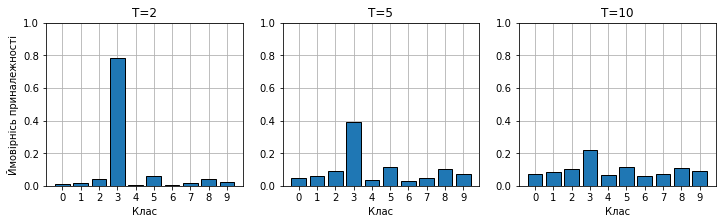

In [72]:
def set_ax(ax):
  ax.set_axisbelow(True)
  ax.set_ylim(0, 1)
  ax.set_xlabel('Клас')
  ax.set_xticks(x)
  ax.set_xticklabels(x)
  ax.grid()

x = np.arange(10)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,3))


set_ax(ax1)
ax1.bar(x, y_2, edgecolor='black')
ax1.set_ylabel('Ймовірнісь приналежності')
ax1.set_title('T=2')

set_ax(ax2)
ax2.bar(x, y_5, edgecolor='black')
ax2.set_title('T=5')

set_ax(ax3)
ax3.bar(x, y_10, edgecolor='black')
ax3.set_title('T=10')

plt.savefig("images/TvsP.pdf", bbox_inches = 'tight', pad_inches = 0)

In [81]:
Y_dist_filt = Y_dist.copy()
for i in range(Y_dist_filt.shape[0]):
  if np.argmax(Y_dist_filt[i]) != Y_train[i]:
    Y_dist_filt[i] = np.array([1 if j==Y_train[i] else 0 for j in range(10)])

In [82]:
np.sum(np.argmax(Y_dist_filt, axis=1) != np.squeeze(Y_train))

0

## Distillation

In [83]:
cls_dist = NeuralNet(layer_dims = [784, 60, 10], learning_rate = 0.1, num_iter = 100, \
                         normalize = False, mini_batch_size=2048, T=T)

(60, 784)
(10, 60)
Cost after iteration 0: 0.230257
Cost after iteration 10: 0.230224
Cost after iteration 20: 0.230156
Cost after iteration 30: 0.230099
Cost after iteration 40: 0.230017
Cost after iteration 50: 0.229873
Cost after iteration 60: 0.229738
Cost after iteration 70: 0.229621
Cost after iteration 80: 0.229543
Cost after iteration 90: 0.229501


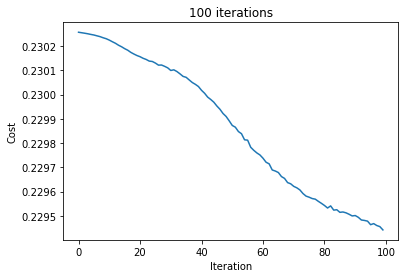

In [84]:
cls_dist.fit(X_train, Y_dist)

In [85]:
#cls_dist.keep_fitting(X_train, Y_dist, 200)

In [86]:
cls_dist.num_iter

100

In [87]:
cls_dist.T = 1

In [88]:
Y_train_hat = cls_dist.predict(X_train)
Y_test_hat = cls_dist.predict(X_test)

print(accuracy_score(Y_train, Y_train_hat))
print(accuracy_score(Y_test, Y_test_hat))

0.6625595238095238
0.6584523809523809


In [89]:
save_to_json(cls_dist.parameters, "nets/distilled_nn_100_T_30")